# Умножение матриц

## Использование оператора Собеля для обнаружения краев в Python с OpenCV

Идеальные результаты обнаружения краев на изображениях могут показать, как набор соединенных кривых указывает на границы объектов. Эти границы, маркированные как контуры, а также кривая, отражающая непрерывную поверхность.

Поэтому использование алгоритма обнаружения краев на изображениях поможет сократить объем обрабатываемых данных, позволяя отфильтровать несвязанную информацию, при этом сохраняя важные структурные атрибуты. Если этап обнаружения краев выполнен успешно, анализ изображения станет более простым, но получение идеального края средней сложности не всегда возможно.

Часто контуры, извлеченные из сложных изображений, могут быть запутаны фрагментацией, где кривые краев не связаны, есть пропущенные участки контуров и ложные контуры, не имеющие отношения к изучаемому явлению на изображении.

Обнаружение краев играет важную роль в обработке изображений, исследовании изображений, распознавании образов и компьютерном з

В области обработки изображений и компьютерного зрения оператор Sobel, или также известный как оператор Sobel–Feldman или фильтр Sobel, играет важную роль в выделении краев на изображениях. 
Этот оператор назван в честь работы Фельдмана и Собела, которые представили его на конференции Стэнфордской лаборатории искусственного интеллекта в 1968 году. Он использует небольшие свертки фильтра в горизонтальном и вертикальном направлениях для вычисления градиента изображения, что делает его вычислительно эффективным. 
Однако следует учитывать, что иногда градиент, который он обнаруживает, может быть несколько грубым, особенно при комплексных изменениях на изображениях с высокой частотой.
Оператор Sobel использует два 3x3 ядра и выполняет свертку с исходным изображением для вычисления приблизительного градиента: одно ядро для вертикальных изменений (SY) и одно для горизонтальных изменений (SX). Если обозначить исходное изображение как I, то радва яд обознача![img/222.png](img/222.png)pn![img/333.png](img/333.png)россе.

ПРИМЕР ИЗОБРАЖЕНИЯ ----  

![N1.png](N1.png)

Код программы - 

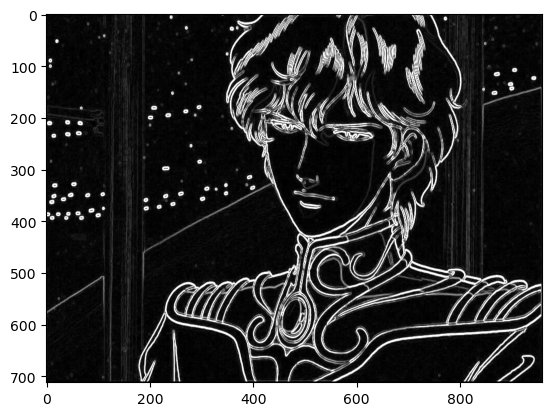

Готовый результат


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

imgCT = Image.open("N1.png").convert("L")
imgCT = np.array(imgCT)

# Создание фильтров Собеля для горизонтального и вертикального направлений
S_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
S_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

row_CT, col_CT = imgCT.shape

# Создание нового изображения для хранения результатов
out_new_CT = np.zeros((row_CT, col_CT))

# Применение фильтра Собеля к каждому пикселю изображения
for r in range(1, row_CT - 1):
    for c in range(1, col_CT - 1):
        # Применение фильтра к окну размером 3x3 вокруг текущего пикселя
        I_x = np.sum(imgCT[r-1:r+2, c-1:c+2] * S_x)
        I_y = np.sum(imgCT[r-1:r+2, c-1:c+2] * S_y)
        
        # Вычисление смешанного значения для текущего пикселя
        out_new_CT[r, c] = np.sqrt(I_x**2 + I_y**2)

# Усиление контраста для лучшей видимости краев
out_new_CT[out_new_CT > 200] = 255

plt.imshow(out_new_CT, cmap='gray')
plt.show()
print("Готовый результат")